<a href="https://colab.research.google.com/github/sonhyuncheol/AI/blob/master/Chapter01_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **머신러닝이란?**

일반적인 프로그래밍은 사전에 규칙(기준)을 정해서 프로그램을 작성한다.

머신러닝 프로그래밍은 프로그램을 만들어서 규칙(기준)을 스스로 찾게 한다.

머신러닝을 데이터에서 규칙(기준)을 찾는다.

# **머신러닝에서 사용하는 용어**

어떤 종류를 나타낼 때는 클래스(Class)라고 한다.

 ex) 도미와 빙어라면 2개의 클래스로 도미 클래스와 빙어 클래스라고 한다.

여러 개의 클래스를 구분하는 문제를 분류(Classification)라고 한다.

2개의 클래스를 구분하는 문제는 이진 분류(Binary Classification)라고 한다.

# **도미 데이터 준비하기**

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
                
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

각각의 생선 데이터들을 샘플(Sample)이라고 한다.

그리고 생선의 길이와 무게를 특성(Feature)이라고 한다.

# **산점도(Scatter Plot)**
두 개의 특성이 있고 데이터 샘플을 표현할 때 산점도(Scatter plot)을 사용한다.

산점도란 x, y축으로 이뤄진 좌표계에 두 변수(x, y)의 관계를 표현하는 방법이다.

x축과 y축에 두 개의 특성을 놓고, 각 샘플을 하나의 점으로 그래프에 표현한다.

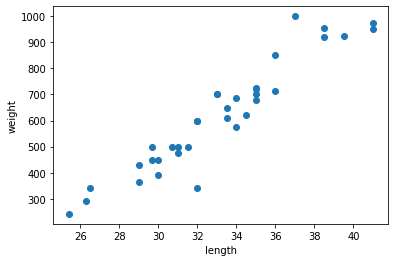

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # x축
plt.ylabel('weight') # y축
plt.show()

파이썬에서 그래프를 그리는 대표적인 패키지는 맷플롯립(matplotlib)이다.

대표적인 파이썬 패키지들은 이미 널리 사용되는 줄임말이 있다. 임포트할 때 as 키워드로 matplotlib.pyplot은 plt라는 약어로 줄여서 사용한다.

x축은 길이, y축은 무게로 2개의 특성을 사용해 그린 그래프이기 때문에 2차원 그래프라고 말한다.

산점도 그래프가 일직선에 가까운 형태로 나타나는 경우를 선형(Liear)적이라고 말한다.

# **빙어 데이터 준비하기**

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

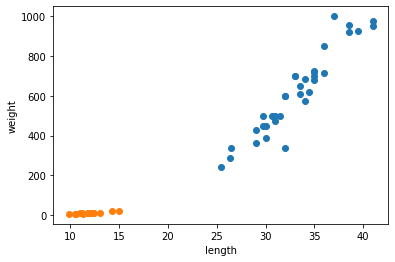

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

scatter()함수를 두 번 연속으로 호출하면 2개의 산점도를 하나의 그래프에 표현한다.

# **첫 번째 머신러닝 프로그램**

도미와 빙어 데이터를 하나의 리스트로 합쳐야한다.

그래야지 머신러닝 프로그래밍이 두 생선을 구분하는 방법을 훈련할 수 있다.

In [5]:
length = bream_length + smelt_length 
weight = bream_weight + smelt_weight

이 책에서 사용하는 머신러닝 패키지는 사이킷런(scikit-learn)이다.

사이킷런 패키지를 사용하기 위해서는 데이터의 각 샘플을 행으로, 각 특성을 열로 2차원 리스트로 만들어야한다.

In [6]:
fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


2차원 리스트를 만들기 위해서 파이썬의 zip()함수와 리스트 내포 구문을 사용한다.

zip()함수는 나열된 리스트 각각에서 하나씩 원소를 꺼내서 반환한다.

for문은 zip()함수로 length와 weight 리스트에서 원소를 하나씩 꺼내서 l과 w에 할당한다.

그러면 [l, w]가 하나의 원소로 구성된 2차원 리스트가 만들어진다.

# **정답 준비하기**

머신러닝이 생선의 길이와 무게를 보고 도미와 빙어를 구분하는 규칙을 찾기 위해서는 샘플의 어떤게 도미인지 빙어인지 알려줘야한다.

이런 방식을 지도학습이라고한다.

In [7]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


머신러닝에서 이진 분류, 2개의 클래스를 구분하는 경우에 찾으려는 대상을 1로 놓고 그 외에는 0으로 놓는다.

우리는 찾으려는 대상이 도미이기 때문에 도미를 1로 빙어를 0으로 놓았다. 반대로 빙어가 찾는 대상이라면 빙어를 1로 도미를 0으로 놓으면 된다.

# **학습하기**

사이킷런 패키지에 KNeighborsClassifier 클래스라는 k-최근접 이웃 알고리즘이 구현이 되어있다.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

k-최근접 이웃 알고리즘을 이용하기 위해서 KNeighborsClassifier를 임포트한다.

임포트한 클래스의 객체를 만든다.

In [9]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

fish_data와 fish_target 이 두 데이터를 객체의 fit()메소드에 전달합니다.

그러면 fit()메소드가 도미를 찾기 위한 기준(규칙)을 학습합니다.

이때 객체를 모델이라고 부르고, 모델에 데이터를 전달하여 규칙을 학습하는 과정을 훈련이라고 부릅니다.


In [10]:
kn.score(fish_data, fish_target)

1.0

훈련이 끝나면 모델이 얼마나 잘 훈련되었는지 평가해야한다.

모델을 평가하기 위해서는 사이킷런의 score()메소드를 사용하면 된다.

이 메소드는 0에서 1 사이의 값을 반환하는데 1은 100% 다 맞췄다는 뜻이다.

이 메소드를 통해서 나온 값을 정확도(accuracy)라고 부른다.

# **k-최근접 이웃 알고리즘**

k-최근접 이웃 알고리즘은 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용한다.

여기서 k는 주위를 바라볼 이웃의 개수로 default는 5다.

정리하면 k-최근접 이웃 알고리즘은 5개의 주변 데이터를 보고, 주변 데이터의 클래스 중 가장 많은 클래스를 정답 클래스로 사용한다.

예를 들어서, 주위에 도미가 2개고 빙어가 3개면 빙어가 많으니까 빙어를 정답으로 사용한다.

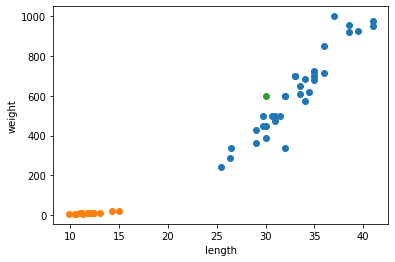

In [14]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이가 30cm이고, 무게가 600g인 새로운 생선 데이터가 있다고 가정해보자.

직관적으로 봐도 이 데이터는 도미라는 것을 알 수 있다. 왜냐하면 그 데이터의 주변에 다른 도미 데이터가 많기 때문이다.

그러면 k-최근접 이웃 알고리즘도 도미라고 판단할까?

In [13]:
kn.predict([[30, 600]])

array([1])

predict()메소드는 새로운 데이터의 정답을 예측한다.

predict()메소드 또한 fit()메소드와 마찬가지로 데이터를 전달할 때 2차원 리스트로 전달해야한다.

새로운 데이터가 도미라면 1, 빙어라면 0이 나온다.

반환되는 값은 1이 나왔다. 훈련한 모델은 새로운 생선 데이터를 도미라고 판단했다.

In [22]:
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


k-최근접 이웃 알고리즘을 사용하기 위해 준비해야 할 일은 데이터를 모두 가지고 있으면 된다.

새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지를 살펴보기만 하면 된다.

단점은 k-최근접 알고리즘의 이런 특징 때문에 데이터가 아주 많은 경우 사용하기가 어렵다.

데이터가 크기 때문에 메모리가 많이 필요하고 직선거리를 계산하는데 많은 시간이 필요하다.

사이킷 런의 KNeighborsClassifier 클래스는 _fit_X 속성에 전달한 fish_data를 모두 가지고 있다. 또한 _y 속성에 전달한 fish_target을 가지고 있다.

실제로 k-최근접 이웃 알고리즘은 훈련되는 것은 없는 셈이다.

fit()메소드에 전달한 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 구분한다.

In [18]:
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

주변의 이웃을 바라볼 개수, 즉, 참고 데이터의 개수를 지정할 수 있다.

KNeighborsClassifier 클래스의 n_neighbors 매개변수에 참고 데이터의 개수를 지정하면 된다.

정확도 71%가 나왔다. 참고 데이터의 개수를 49개로 지정했고, fish_data의 데이터 49개 중에 도미 클래스가 35개이므로 빙어 클래스도 도미라고 예측하기 때문에 35/49의 정확도 71%가 나온 것이다.